### 1D CA Basics:

The following link was greatly informative in understanding and implementing both one- and two-dimensional CA:
https://natureofcode.com/book/chapter-7-cellular-automata/

We first explore the implementation and emergent behavior of one-dimensional cellular automata.  In one dimension, a CA is a row of cells which can each take one of two states--zero and one.  The CA evolves in discrete timesteps, and with each evolution, the new state of a given cell is a function only of the former states of the cells in its "neighborhood."  

We will apply periodic boundary conditions to these cases, and will take the neighborhood of a cell to be itself and its immediate neighbors.   We will use the following convention, established by Wolfram, in referencing the 256 possible functions which determine the evolution of the system.

Consider the eight possible 3-cell neighborhood configurations in the following order: 
111, 110, 101, 100, 011, 010, 001, 000. 
Each of these must result either in a zero or a one in the next timestep. When each of these outputs is listed in the same order as above, an eight-digit binary number is thus specified.  This number is converted to an integer i, and the function is called "Rule i"



In [2]:
# We'll first create functions to initialize a one-dimensional grid of cells and to represent the evolution rules

import numpy as np
import matplotlib.pyplot as plt

def create_1d_grid(length):
    '''
    Creates a 1d grid of specified length
    
    length: (int) number of cells in grid
    '''
    return np. zeros(length)




def rule(integer):
    '''
    Takes an integer between 0 and 256 and returns a dictionary relating the 8 three digit binary numbers (as strings)
    to either zero or one
    
    integer: (int) integer between 0 and 256
    '''
    mapping = {}
    for i in range(8):
        mapping[str(format(i, '03b'))] = int(format(integer, '08b')[7 - i])
        
    return mapping
    
    
#Now we make the simple function which applies the rule to a specific number

def evolve_one_cell(mapping, binary):
    '''
    Takes in a three-digit binary number and a dictionary output by rule and returns either zero or 1 based on the 
    correspondence described above
    
    mapping: (dict) dictionary output by the rule function
    binary: (string) three digit binary number as a string
    
    returns: (int) 0 or 1
    '''
    
    return mapping[binary]

In [7]:
print(rule(40))      #test that the functions work as expected

evolve_one_cell(rule(40), '011')

{'000': 0, '001': 0, '010': 0, '011': 1, '100': 0, '101': 1, '110': 0, '111': 0}


1

In [3]:
#We now create a function that simulates a one-dimensional CA for n steps and returns a two-dimensional array, where the 
#first column is the 1d array at step 0, the second step 1 and so on

def simulate_1d_CA(grid, int_rule, n_steps):
    '''
    Simulates a one-dimensional CA for n_steps on a given grid under a given rule
    
    grid: (array) starting configuration of arbitrary length
    int_rule: (int) integer between 0 and 256 which determines evolution rules
    n_steps: (int) number of time steps to simulate
    '''
    
    output_array = []
    output_array.append(grid)
    mapping = rule(int_rule)
    
    for i in range(n_steps):
        new_row = []
        for j in range(len(grid)):
            binary_string = str(grid[j - 1])[0] + str(grid[j])[0] + str(grid[(j + 1) % len(grid)])[0]
           
            new_row.append(evolve_one_cell(mapping, binary_string))
            
        output_array.append(new_row)
        grid = new_row
        
    return np.array(output_array)

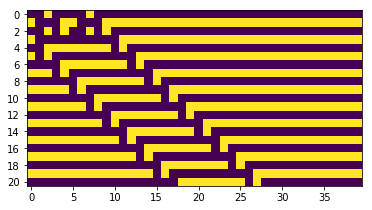

In [127]:
x = create_1d_grid(40)     #test the function 
x[2] = 1
x[7] = 1

y = simulate_1d_CA(x, 9, 20)
len(y)
im = plt.imshow(y)
plt.yticks(np.linspace(0, 20, 11))
plt.show()

In [4]:
# Make the plotting procedure above into a function

import matplotlib.patches as mpatches

def plot_1d_CA(grid, int_rule, n_steps, sequence_start = None, just_sequence = False):
    '''
    Plots the evolution in time of a 1d cellular automaton
    
    grid: (array) as above
    int_rule: (int) as above
    n_steps: (int) as above
    sequence_start: (int) if not None, then returns a sequence of integers read out in binary starting with the position
        specified, moving down the rows
    '''
    
    y = simulate_1d_CA(grid, int_rule, n_steps)
    
    if just_sequence == False:
        fig = plt.figure()
        im = plt.imshow(y, cmap = 'cividis')
        if n_steps < 50:
            plt.yticks(np.arange(n_steps / 2 + 1) * 2)
    
        plt.title('1D CA--Rule %d' %(int_rule))
        plt.xlabel('Cell Index')
        plt.ylabel('Timesteps')
    
        #The following three lines are based on code found at 
        #https://stackoverflow.com/questions/25482876/how-to-add-legend-to-imshow-in-matplotlib
        colors = [im.cmap(im.norm(value)) for value in [0, 1]] 
        patches = [mpatches.Patch(color=colors[0], label="Zero"), mpatches.Patch(color=colors[1], label = 'One')]
        plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
    #return the integer sequence:
    if sequence_start != None:
        sequence = []
        for l, i in enumerate(y):
            count = 0 
            multiplier = 2 ** l
            for j in range(min(l + 1, len(i) - sequence_start)):
                count += multiplier * i[sequence_start + j % len(i)]
                multiplier = multiplier * 1/2
            if len(sequence) > 0:
                if count == sequence[-1]:
                    break
            sequence.append(count)
        return sequence
    

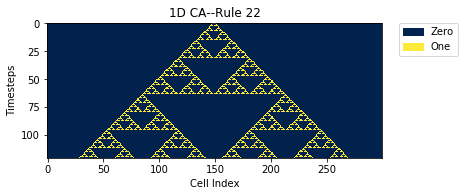

In [452]:
z = create_1d_grid(300)
z[149] = 1
plot_1d_CA(z, 22, 120)

In [114]:
rule(22)     #By looking at rule 22, we can see why the above pattern has a large void where it does; 
             #in that row, between the leftmost and rightmost one values, there are no
             #no zeros which aren't between two ones, and in the rule, all the numbers with only one zero, as well as 111,
             #produce a zero

{'000': 0,
 '001': 1,
 '010': 1,
 '011': 0,
 '100': 1,
 '101': 0,
 '110': 0,
 '111': 0}

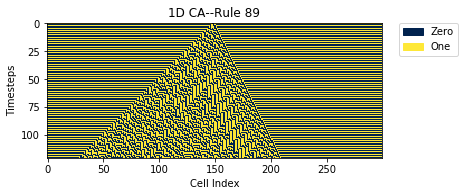

In [463]:
z = create_1d_grid(300)
z[149] = 1
plot_1d_CA(z, 89, 120)

[1.0,
 3.0,
 5.0,
 11.0,
 21.0,
 43.0,
 85.0,
 171.0,
 341.0,
 683.0,
 1365.0,
 2731.0,
 5461.0,
 10923.0,
 21845.0,
 43691.0,
 87381.0,
 174763.0,
 349525.0,
 699051.0,
 1398101.0,
 2796203.0,
 5592405.0,
 11184811.0,
 22369621.0,
 44739243.0,
 89478485.0,
 178956971.0,
 357913941.0,
 715827882.0,
 1431655764.0]

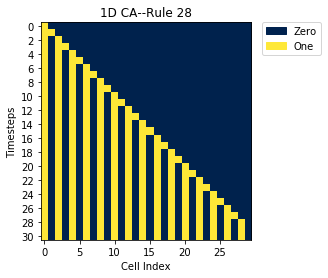

In [457]:
#Have now added a sequence output to the plot function which converts sets of cells to integers beginning at a 
#specified starting position (where 1 cell 'on' initially) 
z = create_1d_grid(30)
z[0] = 1
plot_1d_CA(z, 28, 30, sequence_start = 0)

In [102]:
#Let's try to visualize the divergence of each of these sequences.  We'll look at all even numbered rules up to 100, plotting
#the spacing between integers in their respective sequences

z = create_1d_grid(100)
z[49] = 1
gaps = {}
for i in (np.arange(1, 51) * 2):
    y = plot_1d_CA(z, i, 50, sequence_start = 49, just_sequence = True)
    gaps_in_y = []
    for j, v in enumerate(y):
        if j != 0:
            gaps_in_y.append(v - y[j-1])
    gaps[i] = gaps_in_y
    
kept_gaps = {}
for key in gaps:
    if len(gaps[key]) > 30 and np.alltrue(np.array(gaps[key]) > 0):
        kept_gaps[key] = gaps[key]
    


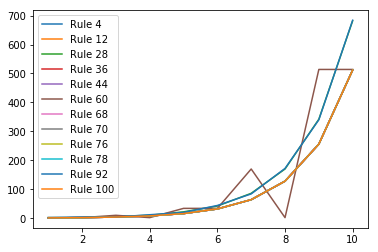

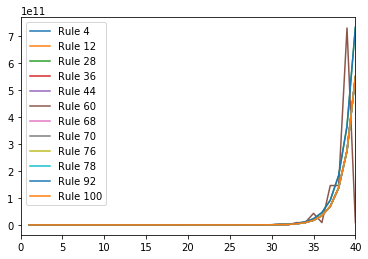

In [117]:
fig = plt.figure()
for i in kept_gaps:
    plt.plot(np.arange(1, len(kept_gaps[i][:10])+1), kept_gaps[i][:10], label = 'Rule {}'.format(i))
plt.legend()
plt.show()

fig2 = plt.figure()
for i in kept_gaps:
    plt.plot(np.arange(1, len(kept_gaps[i][:40])+1), kept_gaps[i][:40], label = 'Rule {}'.format(i))
plt.legend()
plt.xlim([0, 40])
plt.show()

In [113]:
#we can see that the behavior is largely similar for many of the rules which produce nondecreasing sequences; an outlier is
#rule 60, the only rule whose gaps line in the plot above is not also strictly increasing.  We take a look below at 
#the sequence for this rule, as well as its evolution plot
kept_gaps[60]

[2.0,
 2.0,
 10.0,
 2.0,
 34.0,
 34.0,
 170.0,
 2.0,
 514.0,
 514.0,
 2570.0,
 514.0,
 8738.0,
 8738.0,
 43690.0,
 2.0,
 131074.0,
 131074.0,
 655370.0,
 131074.0,
 2228258.0,
 2228258.0,
 11141290.0,
 131074.0,
 33686018.0,
 33686018.0,
 168430090.0,
 33686018.0,
 572662306.0,
 572662306.0,
 2863311530.0,
 2.0,
 8589934594.0,
 8589934594.0,
 42949672970.0,
 8589934594.0,
 146028888098.0,
 146028888098.0,
 730144440490.0,
 8589934594.0,
 2207613190658.0,
 2207613190658.0,
 11038065953290.0,
 2207613190658.0,
 37529424241186.0,
 37529424241186.0,
 187647121205930.0,
 8589934594.0,
 562958543486978.0,
 562958543486978.0]

[1.0,
 3.0,
 5.0,
 15.0,
 17.0,
 51.0,
 85.0,
 255.0,
 257.0,
 771.0,
 1285.0,
 3855.0,
 4369.0,
 13107.0,
 21845.0,
 65535.0,
 65537.0,
 196611.0,
 327685.0,
 983055.0,
 1114129.0,
 3342387.0,
 5570645.0,
 16711935.0,
 16843009.0,
 50529027.0,
 84215045.0,
 252645135.0,
 286331153.0,
 858993459.0,
 1431655765.0,
 4294967295.0,
 4294967297.0,
 12884901891.0,
 21474836485.0,
 64424509455.0,
 73014444049.0,
 219043332147.0,
 365072220245.0,
 1095216660735.0,
 1103806595329.0,
 3311419785987.0,
 5519032976645.0,
 16557098929935.0,
 18764712120593.0,
 56294136361779.0,
 93823560602965.0,
 281470681808895.0,
 281479271743489.0,
 844437815230467.0,
 1407396358717445.0]

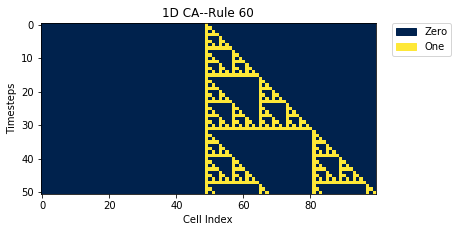

In [126]:
z = create_1d_grid(100)
z[49] = 1
plot_1d_CA(z, 60, 50, sequence_start = 49)

## 2D Cellular Automata:

Now we move on to implementing two-dimensional cellular automata.  In this case, a neighborhood consists of nine cells.  The evolution rules will no longer be a 1-1 mapping of possible neighborhood states to outcomes, but will be based instead on aggregate statistics of the neighborhood (e.g. total number of 'on' or 'off' cells, etc.) 

In [5]:
#We start by creating a function that produces a 2D grid, either with random values or with all zeros;
#we then write our functions for simulating and plotting the CA which results from a given rule

def create_2d_grid(rows, columns, random = True):
    '''
    Creates a two-dimensional grid of numbers
    
    rows: (int) number of rows
    columns: (int) number of columns
    random: (bool) if True, then the grid values are randomly either zero or one; if False, then all are zero
    
    returns: 2D array
    '''
    if random:
        return np.random.randint(0, 2, (rows, columns))
    return np.zeros((rows,columns))


#let's define a first rule function.  We'll use the same parameters as in Conway's 'game of life'; we are ultimately
#going to let the simulate_2d_CA function take an arbitrary rule function as input though

def game_of_life(array, position):
    '''
    Takes an array and coordinates for a cell in that array and updates the cell based on Conway's 'game of life' rules
    
    array: 2D array
    position: (tuple) (row, column) position of cell
    
    returns: (int) either 0 or 1
    '''
    u = position[0]
    v = position[1]
    neighbor_sum = 0
    for i in range(-1, 2):
        for j in range(-1, 2):
            neighbor_sum += array[(u+i) % len(array), (v+j) % len(array[0])]
    neighbor_sum -= array[u,v]
    
    if array[position] == 0:
        if neighbor_sum == 3:
            return 1
        else:
            return 0
    else:
        if neighbor_sum == 2 or neighbor_sum == 3:
            return 1
        else:
            return 0

In [346]:
f = create_2d_grid(10,10)
f

array([[1, 1, 1, 0, 0, 1, 1, 0, 1, 1],
       [0, 1, 0, 1, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 1, 1],
       [0, 0, 1, 1, 1, 1, 1, 1, 0, 1],
       [0, 0, 1, 1, 0, 0, 0, 0, 1, 0],
       [1, 1, 0, 1, 0, 1, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 1, 0, 1, 0, 0],
       [0, 1, 1, 1, 1, 1, 0, 0, 0, 0],
       [1, 0, 1, 1, 1, 1, 0, 1, 1, 1],
       [1, 0, 1, 1, 1, 1, 1, 1, 0, 1]])

In [155]:
g = create_2d_grid(5,5, random = False)     #we test the game of life function
for i in range(5):
    for j in range(5):
        g[i,j] = game_of_life(f, (i,j))
g

array([[0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [6]:
#now for the simulate_2d_CA function

def simulate_2d_CA(array, rule, n_steps, rule_type = True):
    '''
    Takes a two-dimensional array and an evolution rule and simulates a CA for 'n_steps' steps
    
    array: 2D array
    rule: (function) evolution rule
    n_steps: (int) number of time steps in simulation
    rule_type: if True, then the rule function updates a single value; if False, it updates the whole array
    
    returns: (array) 3d array, effectively a list of all 2d grid states
    '''
    u = len(array)
    v = len(array[0])
    output = []
    output.append(array)
    initial_grid = array
    if rule_type:
        for i in range(n_steps):
            new_grid = create_2d_grid(u, v, random = False)
            for j in range(u):
                for k in range(v):
                    new_grid[j, k] = rule(initial_grid, (j, k))
            output.append(new_grid)
            initial_grid = new_grid
    else:
        for i in range(n_steps):
            new_grid = rule(initial_grid)
            output.append(new_grid)
            initial_grid = new_grid
    return np.array(output)

In [347]:
simulate_2d_CA(f, game_of_life, 5)     #test the function

array([[[1., 1., 1., 0., 0., 1., 1., 0., 1., 1.],
        [0., 1., 0., 1., 1., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 1., 1.],
        [0., 0., 1., 1., 1., 1., 1., 1., 0., 1.],
        [0., 0., 1., 1., 0., 0., 0., 0., 1., 0.],
        [1., 1., 0., 1., 0., 1., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1., 1., 0., 1., 0., 0.],
        [0., 1., 1., 1., 1., 1., 0., 0., 0., 0.],
        [1., 0., 1., 1., 1., 1., 0., 1., 1., 1.],
        [1., 0., 1., 1., 1., 1., 1., 1., 0., 1.]],

       [[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 1., 0., 1., 0., 0., 1., 1., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
        [0., 0., 1., 0., 0., 1., 1., 1., 0., 1.],
        [1., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 1., 0., 1., 0., 1., 1., 1., 1., 1.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]

In [7]:
#now we explore how to plot the evolution of a 2d array.  We'll first try simply producing a fixed number of keyframes.  
#Then, we'll make an interactive tool which can explore the grid's evolution in full

def plot_2d_CA(array, rule, n_steps, n_images, rule_type = True, rule_name = None):
    '''
    Simulates a 2d CA with given rule and step count and plots n_images many frames of the output (in different figures)
    
    array: 2d array
    rule: (function) evolution rule
    n_steps: (int) number of time steps
    n_images: (int) number of output images, each evenly spaced within the total output
    rule_name: (str) name of rule to be used in title
    '''
    y = simulate_2d_CA(array, rule, n_steps, rule_type = rule_type)
    for i in range(n_images):
        fig = plt.figure()
        number = (n_steps // n_images) * i
        im = plt.imshow(y[number], cmap = 'cividis')
        if rule_name == None:
            plt.title('2D CA--frame {}'.format(number))
        else:
            plt.title('2D CA--{}--frame {}'.format(rule_name, number))
        plt.xlabel('Cell Index - x')
        plt.ylabel('Cell Index - y')
    
        #The following three lines are based on code found at 
        #https://stackoverflow.com/questions/25482876/how-to-add-legend-to-imshow-in-matplotlib
        colors = [im.cmap(im.norm(value)) for value in [0, 1]] 
        patches = [mpatches.Patch(color=colors[0], label="Zero"), mpatches.Patch(color=colors[1], label = 'One')]
        plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

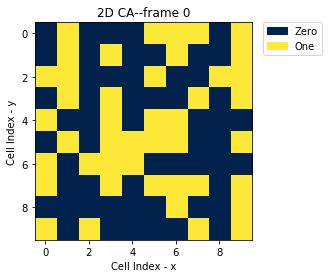

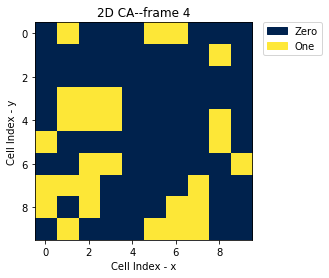

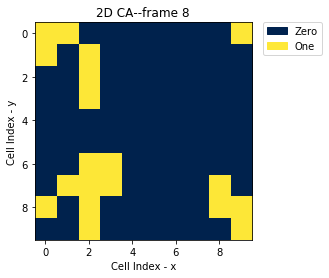

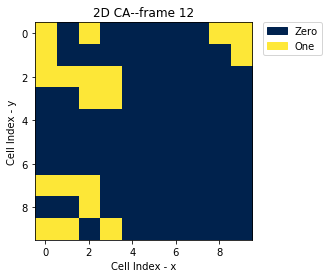

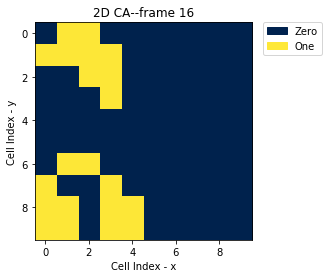

In [9]:
f = create_2d_grid(10,10)
plot_2d_CA(f, game_of_life, 20, 5)     #test the function

In [30]:
#now we make a function which produces an interactive plot of the system

#info on ipywidgets and interact function found at https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

def interactive_2d_CA(array, rule, n_steps, rule_type = True, rule_name = None, return_heights = False):
    '''
    Produces an interactive plot of the evolution of a 2d CA
    
    Inputs: all as above except:
    return_heights: if True, then returns a list of sums of heights for each grid
    
    returns: plot with interactive slider
    '''
    y = simulate_2d_CA(array, rule, n_steps, rule_type = rule_type)
    def p(i):
        fig, ax = plt.subplots()
        number = i
        im = ax.imshow(y[i], cmap = 'cividis')
    
        if rule_name == None:
            plt.title('2D CA--frame {}'.format(number))
        else:
            plt.title('2D CA--{}--frame {}'.format(rule_name, number))
        plt.xlabel('Cell Index - x')
        plt.ylabel('Cell Index - y')
    
        #The following three lines are based on code found at 
        #https://stackoverflow.com/questions/25482876/how-to-add-legend-to-imshow-in-matplotlib
        colors = [im.cmap(im.norm(value)) for value in [0, 1]] 
        patches = [mpatches.Patch(color=colors[0], label="Zero"), mpatches.Patch(color=colors[1], label = 'One')]
        plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
    interact(p, i = widgets.IntSlider(min = 0, max = n_steps))
    
    if return_heights:
        heights = []
        for i in y:
            height_sum = 0
            for k in range(len(i)):
                for j in range(len(i[0])):
                    height_sum += i[k,j] * (len(i) - 1 - k)
            heights.append(height_sum)
        return np.array(heights)

In [11]:
f = create_2d_grid(10, 10)     #test the function
interactive_2d_CA(f, game_of_life, 10)

interactive(children=(IntSlider(value=0, description='i', max=10), Output()), _dom_classes=('widget-interact',…

In [12]:
#Now we experiment with new rules of evolution for 2d CA.  Namely, we'll implement a new rule function meant to implement
#the falling of many massive particles (e.g. sand)

#we want the rule to be such that a particle will fall straight down if the space below them is not blocked,
#either to the left or right with equal probability if it is blocked, to the left or right with probability one if two of
#the three cells below are blocked, and will stay put o/w

#to implement this rule function, it will be easiest to construct it such that it takes an input array and outputs an entire
#new array, rather than looking at a single position in an input array and outputting one or zero

def falling_sand(array):
    '''
    Function for simulating falling particles; particles will fall straight down unless blocked, in which case they'll fall 
    down-left or down-right with equal chance; periodic boundary conditions are not in effect--the bottom and sides are 'hard'
    
    Input: as before
    
    returns: new array
    '''
    N = len(array)
    M = len(array[0])
    output_array = np.zeros((N, M))
    for i in range(N):
        for j in range(M):
            output_array[i,j] = array[i,j]
    
    switch = 0
    for i in range(N-1, -1, -1):
        if switch % 2 == 0:
            for j in range(M):
                if array[i,j] == 1 and i != N - 1:
                    space_below = False
                    for k in range(1, N - i):
                        if output_array[i+k, j] == 0:
                            space_below = True
                    if space_below == True:
                        output_array[i+1,j] = 1
                        output_array[i,j]=0
                    else:
                        if j == 0:
                            if output_array[i+1,j+1] == 0:
                                output_array[i+1,j+1] =1
                                output_array[i,j] = 0
                        elif j == M - 1:
                            if output_array[i+1,j-1] == 0:
                                output_array[i+1,j-1] = 1
                                output_array[i,j] = 0

                        else:
                            if output_array[i+1, j-1] == 0 and output_array[i+1,j+1] == 1:
                                output_array[i+1, j-1] = 1
                                output_array[i,j] = 0
                            elif output_array[i+1, j-1] == 1 and output_array[i+1, j+1] == 0:
                                output_array[i+1,j+1] = 1
                                output_array[i,j] = 0
                            elif output_array[i+1,j+1] == 0 and output_array[i+1,j-1] == 0:
                                r = np.random.random()
                                if r > 0.5:
                                    output_array[i+1,j+1] = 1
                                    output_array[i,j] = 0
                                else:
                                    output_array[i+1, j-1] = 1
                                    output_array[i,j] = 0
        else:
            for j in range(M-1, -1, -1):
                if array[i,j] == 1 and i != N - 1:
                    space_below = False
                    for k in range(1, N - i):
                        if output_array[i+k, j] == 0:
                            space_below = True
                    if space_below == True:
                        output_array[i+1,j] = 1
                        output_array[i,j]=0
                    else:
                        if j == 0:
                            if output_array[i+1,j+1] == 0:
                                output_array[i+1,j+1] =1
                                output_array[i,j] = 0
                        elif j == M - 1:
                            if output_array[i+1,j-1] == 0:
                                output_array[i+1,j-1] = 1
                                output_array[i,j] = 0

                        else:
                            if output_array[i+1, j-1] == 0 and output_array[i+1,j+1] == 1:
                                output_array[i+1, j-1] = 1
                                output_array[i,j] = 0
                            elif output_array[i+1, j-1] == 1 and output_array[i+1, j+1] == 0:
                                output_array[i+1,j+1] = 1
                                output_array[i,j] = 0
                            elif output_array[i+1,j+1] == 0 and output_array[i+1,j-1] == 0:
                                r = np.random.random()
                                if r > 0.5:
                                    output_array[i+1,j+1] = 1
                                    output_array[i,j] = 0
                                else:
                                    output_array[i+1, j-1] = 1
                                    output_array[i,j] = 0
        switch += 1
    return output_array
                
                            
            

In [436]:
f = create_2d_grid(10, 10)
f

array([[1, 1, 0, 0, 1, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 1, 0, 0, 1, 1, 0],
       [1, 1, 1, 0, 0, 1, 1, 1, 0, 1],
       [1, 0, 1, 1, 0, 0, 0, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 0, 1, 0, 1],
       [0, 0, 0, 0, 1, 1, 1, 1, 0, 0],
       [0, 0, 1, 0, 1, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 1, 1, 1, 1, 0],
       [1, 0, 1, 1, 1, 0, 1, 1, 1, 0],
       [0, 0, 0, 1, 0, 1, 1, 1, 1, 0]])

In [437]:
falling_sand(f)     #test the function

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 0., 0., 1., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1., 0., 0., 1., 1., 0.],
       [1., 1., 1., 0., 0., 1., 1., 1., 0., 1.],
       [1., 0., 1., 1., 0., 0., 0., 1., 1., 0.],
       [0., 1., 1., 1., 1., 1., 0., 1., 0., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 0., 0.],
       [0., 0., 1., 0., 1., 1., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [ ]:
h = create_2d_grid(30,30)     #the function looks to be behaving as expected
interactive_2d_CA(h, falling_sand, 20, rule_type = False, rule_name = 'Falling Sand')

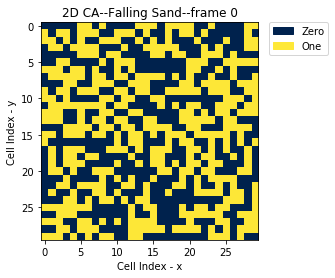

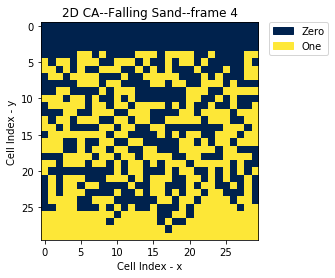

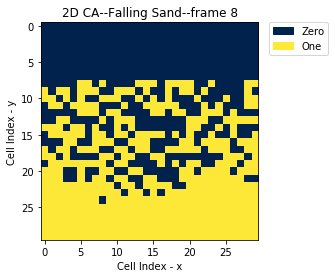

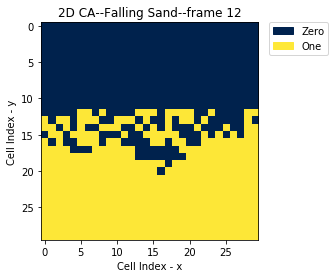

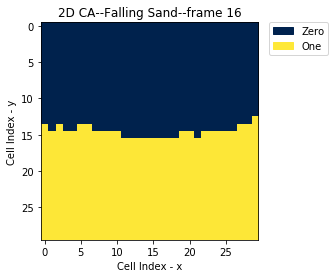

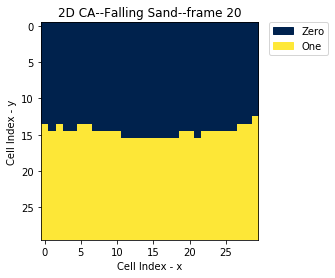

In [440]:
plot_2d_CA(h, falling_sand, 25, 6, rule_type = False, rule_name = 'Falling Sand')

In [31]:
h = create_2d_grid(50,50)
heights = interactive_2d_CA(h, falling_sand, 80, rule_type = False, rule_name = 'Falling Sand', return_heights = True)

interactive(children=(IntSlider(value=0, description='i', max=80), Output()), _dom_classes=('widget-interact',…

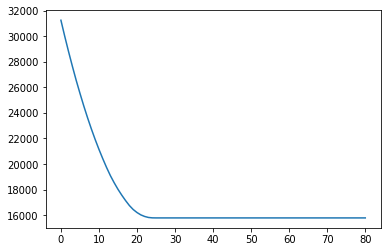

In [34]:
heights
plt.plot(heights)

interactive(children=(IntSlider(value=0, description='i', max=150), Output()), _dom_classes=('widget-interact'…

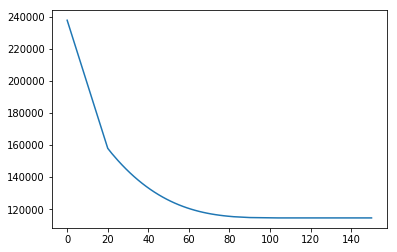

In [38]:
h = create_2d_grid(100,100, random = False)
for i in range(100):
    for j in range(100):
        if i < 80 and j <50:
            h[i,j] = 1
heights = interactive_2d_CA(h, falling_sand, 150, rule_type = False, rule_name = 'Falling Sand', return_heights = True)
plt.plot(heights)

In [36]:
heights

interactive(children=(IntSlider(value=0, description='i', max=300), Output()), _dom_classes=('widget-interact'…

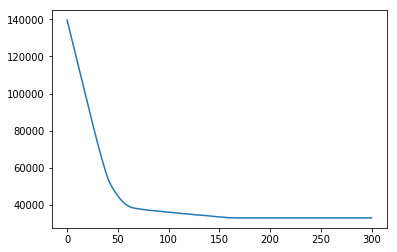

In [39]:
h = create_2d_grid(100, 100, random=False)
for i in range(100):
    for j in range(100):
        if 27 < j < 75 and 10 + int(np.trunc(20*np.sin(3 + 0.4*j))) < i < 60 - int(np.trunc(20*np.sin(3 + 0.4*j))):
            h[i,j] = 1
g = interactive_2d_CA(h, falling_sand, 300, rule_type = False, rule_name = 'Falling Sand', return_heights = True)
plt.plot(g)

In [56]:
h = create_2d_grid(100, 100, random=False)
for i in range(100):
    for j in range(100):
        if 30 < j < 70 and 20 < i < 80:
            h[i,j] = 1
g = interactive_2d_CA(h, falling_sand, 100, rule_type = False, rule_name = 'Falling Sand', return_heights = True)

interactive(children=(IntSlider(value=0, description='i'), Output()), _dom_classes=('widget-interact',))

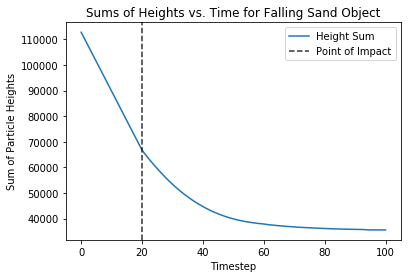

In [71]:
plt.plot(g, label = 'Height Sum')
plt.title('Sums of Heights vs. Time for Falling Sand Object')
plt.xlabel('Timestep')
plt.ylabel('Sum of Particle Heights')
plt.axvline(20, linestyle = '--', label = 'Point of Impact', color = 'k', alpha = .8)
plt.legend()

interactive(children=(IntSlider(value=0, description='i'), Output()), _dom_classes=('widget-interact',))

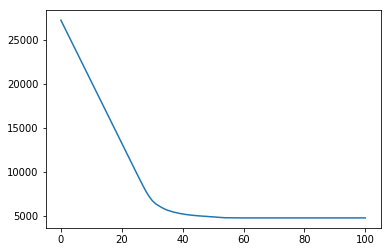

In [41]:
h = create_2d_grid(100, 100, random=False)
r = 15
for i in range(100):
    for j in range(100):
        if 35 < j < 65 and 60 - np.sqrt(r**2 - (j - 50)**2) < i < 60 + np.sqrt(r**2 - (j - 50)**2):
            h[i,j] = 1
g = interactive_2d_CA(h, falling_sand, 100, rule_type = False, rule_name = 'Falling Sand', return_heights = True)
plt.plot(g)


(4000, 7000)

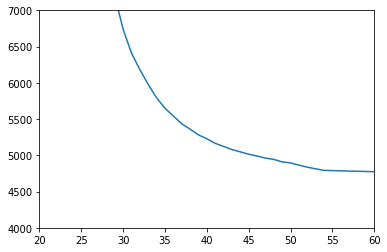

In [47]:
plt.plot(g)
plt.xlim([20, 60])
plt.ylim([4000,7000])

In [ ]:
#Note:  objects seem to, in general, favor deforming 'to the right'.  This is because as each grid is updated, the rows are 
#read left to right.  This ultimately means that whole columns can shift to the right (since columns to their left can fill 
#in gaps in the same update) while whole columns do not shift to the left (instead, the bottom particle will shift left while
#the rest all fall down one)

####*****fixed: now the falling_sand functino alternates between reading the rows left to right and right to left, making
#for more symmetric deformations

#added return_heights keyword to interactive_2d_CA